In [1]:
#compare several sensors to each other

bl_dl258_rubbasin_ara:
-	Vergleich des Signals mit Pegel PLS bl_plsRKBA1201_rubbasin_ara & bl_dl256_rubbasin_ara. Diese sollten eigentlich gleich messen
-	Achtung, die absolute Höhe ist unterschiedliche. Mir geht es darum das Signal a) bei Trockenwetter und b) bei Regenwetter anzuschauen. Helfen kann vlt. die Soil-Moisture-Sensoren an der Wehrkante bm_dl290_rubbasin_ara

bn_dl259_rub_morg
-	Kurzvergleich der kumulativen Regensummen(Jahressummen) mit bn_dl797_rub_morg & bn_r03_rub_morg. Über die letzten Jahre
-	Dl259 ist ein «low-cost»-Regenmesser. Wenn Drift bspw. festgestellt wird wäre es spannend zu sehen wie viel schlechter der Sensor funktioniert auch für die Zukunft. Also schlechte Daten könnten auch gut sein, Wartungsaufwand ist gering 

bl_dl311_rubmorg_inflow:
-	Signalfilterung: Ist das Signal aussagekräftig nach einer Filterung des noise a) bei Trockenwetter b) bei Regenwetter? C) QoS mit Einbezug der Datenfiltuerung(prozentualer Anteil der Filterung)  wahrscheinlich lässt sich das über ein dynamischen Plot relativ gut anschauen. Für Becken hatte ich einmal noch etwas gemacht, suche es noch raus, leider bin ich da beim Plotbereich steckengeblieben dass es «unschön» ist, aber mehrere Achsen, mehrere Signale. Vlt. hilft’s aber wenn nicht einfach ignorieren 

-	Helfen können die Signale bl_plsRKBM1201_rubmorg_inflow & bm_dl332_rub_morg (overflow im selben Teil); Sensoren im Becken(sekundär, bl_plsRKBM1203_rub_morg ; bl_ceaf0_rub_morg ) 


bl_dl315_40d_imberg:
-	Signale hat Sprünge drin. Lassen sich diese rausfiltern, dass die Daten hilfreich sein können? 
-	Bf_F12_47a_zurcherstrasse liegt unterstroms, bm_lm067_ra40a_sbwvoland oberstroms  Vergleich mit Signal(Deswegen Vorschlag oberhalb und unterhalb behalten, dazu braucht es aber noch ein bisschen mehr Infos..)


bl_dl314_50sbw_acherm:
-	Messung sinnvoll vor Dükerung?  Verteilung der Messwerte anschauen(Regenwetter/Trockenwetter) könnte helfen. Nächster Regenmesser: bn_dl798_electrosuisse_luppmenstr
-	Einfluss auf das Gesamtsystem abschätzen, bf_f08_166_luppmenweg liegt auf der anderen Seite vor der Dükerung  falls gering Ausbau


bf_12 und bff_07

In [32]:
import sys
sys.path.append(r'C:\Users\steineph\DataAnalysis\UWO-Dataanalysis\libs')
from datapool_client import DataPool
from UWO_DataAnalysis import helper_functions
import pandas as pd
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
import os
import mplcursors


In [3]:
%matplotlib inline
dp=DataPool()

You are successfully connected to the database!


bl_dl258_rubbasin_ara:
-	Vergleich des Signals mit Pegel PLS bl_plsRKBA1201_rubbasin_ara & bl_dl256_rubbasin_ara. Diese sollten eigentlich gleich messen
-	Achtung, die absolute Höhe ist unterschiedliche. Mir geht es darum das Signal a) bei Trockenwetter und b) bei Regenwetter anzuschauen. Helfen kann vlt. die Soil-Moisture-Sensoren an der Wehrkante bm_dl290_rubbasin_ara

In [9]:
bl_plsRKBA1201_rubbasin_ara=dp.signal.get(source_name='bl_plsRKBA1201_rubbasin_ara', start='2016-01-01', minimal=False, show_query=False, to_dataframe=True)
bl_dl256_rubbasin_ara=dp.signal.get(source_name='bl_dl256_rubbasin_ara', start='2016-01-01', minimal=False, show_query=False, to_dataframe=True)


In [12]:
bl_plsRKBA1201_rubbasin_ara

,timestamp,value,unit,parameter,source,serial,source_type,site
0,2016-01-01 00:00:00,0.000,mm,water_level,bl_plsRKBA1201_rubbasin_ara,RKBA.12.01,PLS,rubbasin_ara
1,2016-01-01 00:01:00,0.000,mm,water_level,bl_plsRKBA1201_rubbasin_ara,RKBA.12.01,PLS,rubbasin_ara
2,2016-01-01 00:02:00,0.000,mm,water_level,bl_plsRKBA1201_rubbasin_ara,RKBA.12.01,PLS,rubbasin_ara
3,2016-01-01 00:03:00,0.000,mm,water_level,bl_plsRKBA1201_rubbasin_ara,RKBA.12.01,PLS,rubbasin_ara
4,2016-01-01 00:04:00,0.000,mm,water_level,bl_plsRKBA1201_rubbasin_ara,RKBA.12.01,PLS,rubbasin_ara
...,...,...,...,...,...,...,...,...
3524348,2022-09-16 05:08:00,286.469,mm,water_level,bl_plsRKBA1201_rubbasin_ara,RKBA.12.01,PLS,rubbasin_ara
3524349,2022-09-16 05:09:00,286.308,mm,water_level,bl_plsRKBA1201_rubbasin_ara,RKBA.12.01,PLS,rubbasin_ara
3524350,2022-09-16 05:10:00,286.519,mm,water_level,bl_plsRKBA1201_rubbasin_ara,RKBA.12.01,PLS,rubbasin_ara
3524351,2022-09-16 05:11:00,286.259,mm,water_level,bl_plsRKBA1201_rubbasin_ara,RKBA.12.01,PLS,rubbasin_ara


In [18]:
#filter
bl_plsRKBA1201_rubbasin_ara=bl_plsRKBA1201_rubbasin_ara[bl_plsRKBA1201_rubbasin_ara['parameter']=='water_level']
bl_dl256_rubbasin_ara=bl_dl256_rubbasin_ara[bl_dl256_rubbasin_ara['parameter']=='water_level']

#make datetime
bl_plsRKBA1201_rubbasin_ara['timestamp']=pd.to_datetime(bl_plsRKBA1201_rubbasin_ara['timestamp'])
bl_dl256_rubbasin_ara['timestamp']=pd.to_datetime(bl_dl256_rubbasin_ara['timestamp'])

data_to_compare=pd.concat([bl_plsRKBA1201_rubbasin_ara, bl_dl256_rubbasin_ara])

Text(0.5, 1.0, 'bl_dl256_rubbasin_ara')

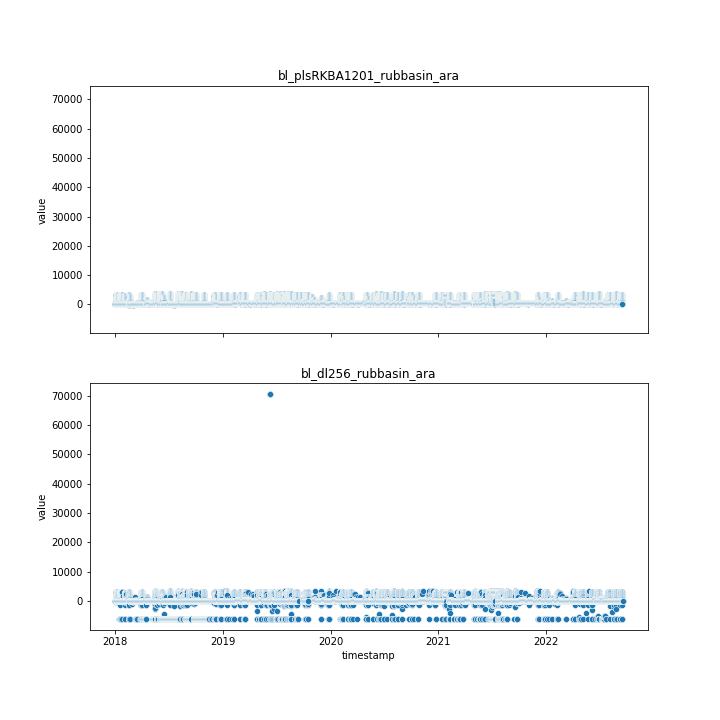

In [31]:
plt.clf()
%matplotlib widget
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharex=True, sharey=True)
ax1=sns.scatterplot(data=bl_plsRKBA1201_rubbasin_ara[bl_plsRKBA1201_rubbasin_ara['timestamp']>'2018-01-01'], x='timestamp', y='value', ax=ax[0])
ax2=sns.scatterplot(data=bl_dl256_rubbasin_ara[bl_dl256_rubbasin_ara['timestamp']>'2018-01-01'], x='timestamp', y='value', ax=ax[1])
ax[0].set_title('bl_plsRKBA1201_rubbasin_ara')
ax[1].set_title('bl_dl256_rubbasin_ara')
#ax2=sns.scatterplot(data=data_to_compare, x='timestamp', y='value', ax=ax[2], hue='source')